# Test Simulation Model and CCC Estimator
The Tools.py module contains the following algorithms:

### CCCEstimator
An estimator of the CCC Model for K timeseries
This Estimator should in future allow for Both GARCH & ARMACH models, with p,q lags. Or at least GARCH(1,1) or ARMACH(1,1)

### Simulate
A Tool-kit for MCMC Simulations.
The Base model, Simulate, takes the following input:

$$num\_series=1, num\_obs=1000, n\_states=2, deterministic=True, transition\_diagonal=None,transition\_matrix=None$$

It Creates an (N x N) Transition Matrix, and Allows the Following Choises:
1. A Transition Matrix is already provided.
    - sets self.n_states to the length.
    - Returns the Transition Matrix
2. The Diagonal Array of the Transition Matrix, or a Single Value is Provided.
    - If a Single Value is provided, it creates an array of self.n_states, with this value
    - If deterministic=True, it sets the off-diagonals to the same value, (1-diagonal) / (self.n_states-1)
    - If deterministic=False, it should draw the off diagonals at random
3. If transition_diagonal=None, transition_matrix=None, and deterministic=True 
    - Create a transition matrix with 0.95 on diagonal, and off-diagonals all the same
4. If transition_diagonal=None, transition_matrix=None, and deterministic=False
    - Draw each transition Probability at random, and 

The model then creates a for loop where it simulates the data.

Further Options Could Include:
1. Choise of Distribution

**Extensions**
1. The SV Model: Creates a Simulation of a Stochastic Volatility Process.
2. The AR Model: Creates a Simulation of an Autoregressive Model
    - Could Include: Moving Average, Further Lags
3. The GARCH Model: Creates a Simulation of a GARCH Model, or an ARMACH model.
    - Could Include: Further Lags
4. The RSDC Model: Creates a Simulation of the RSDC Model, with draws from the GARCH Model.



In [1]:
import pandas as pd
import numpy as np
import importlib
import Tools, EM

[[2.18155904 2.95751007]]


/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

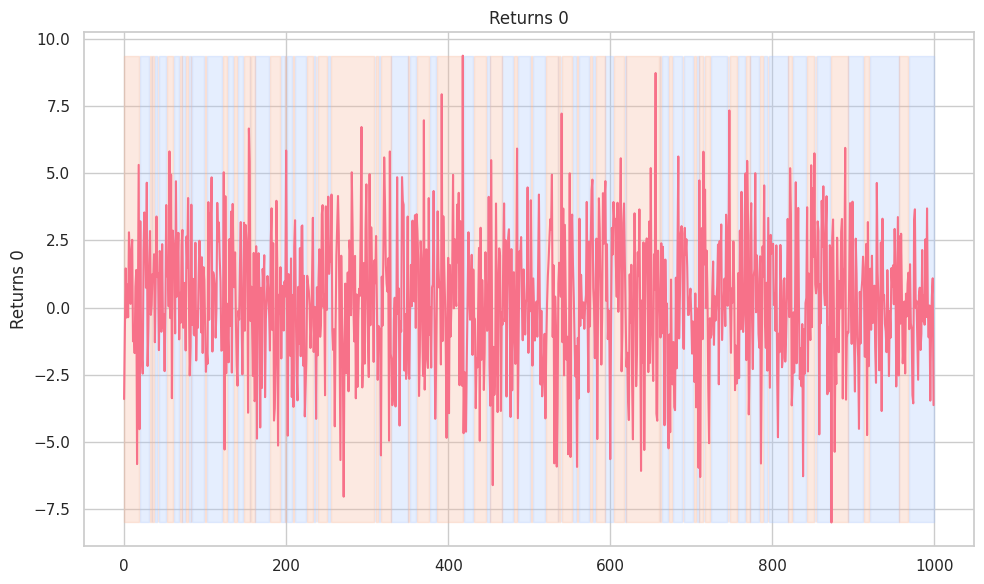

In [2]:
from importlib import reload
reload(Tools)

from Tools import SV
from importlib import reload
reload(EM)
from EM import Base
matr = 0.99
sim = SV(n_states=2, num_series = 1,transition_diagonal=0.9,deterministic=True)
print(sim.sigmas)
sim.simulate()


sim.plot_simulation(separate=True, cum=False)


In [3]:
from importlib import reload
reload(EM)
from EM import Base
model = Base(sim.data,max_iterations=20)
# model.fit()
model.fit()


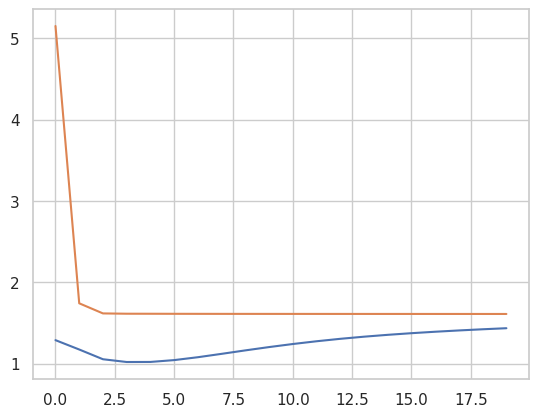

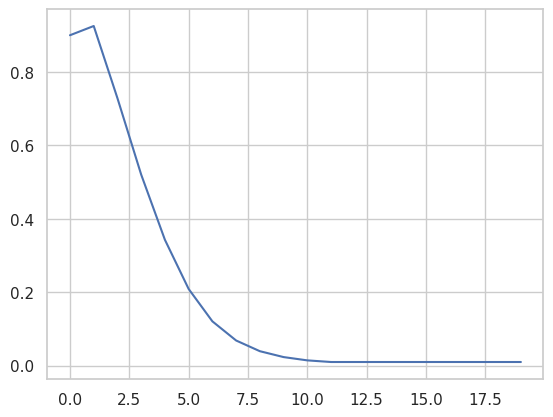

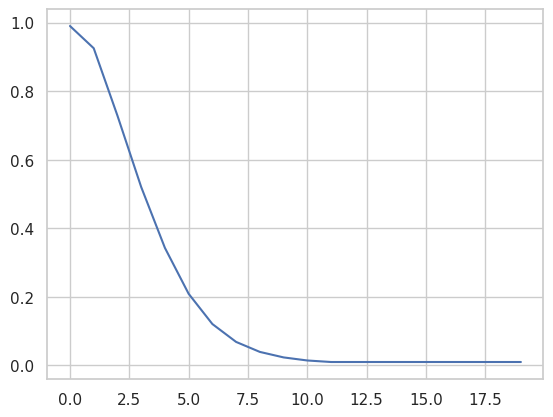

In [4]:

# Assuming some example data for demonstration; replace these with your actual data

import matplotlib.pyplot as plt

import numpy as np





plt.plot(model.sigma_histories[ :, 0], label=f'State {0}')
plt.plot(model.sigma_histories[ :, 1], label=f'State {1}')
plt.show()



# Markov Histories

plt.plot(model.markov_histories[:, 0], label=f'State {0}')



plt.show()

plt.plot(model.markov_histories[:, 1], label=f'State {1}')
plt.show()


/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

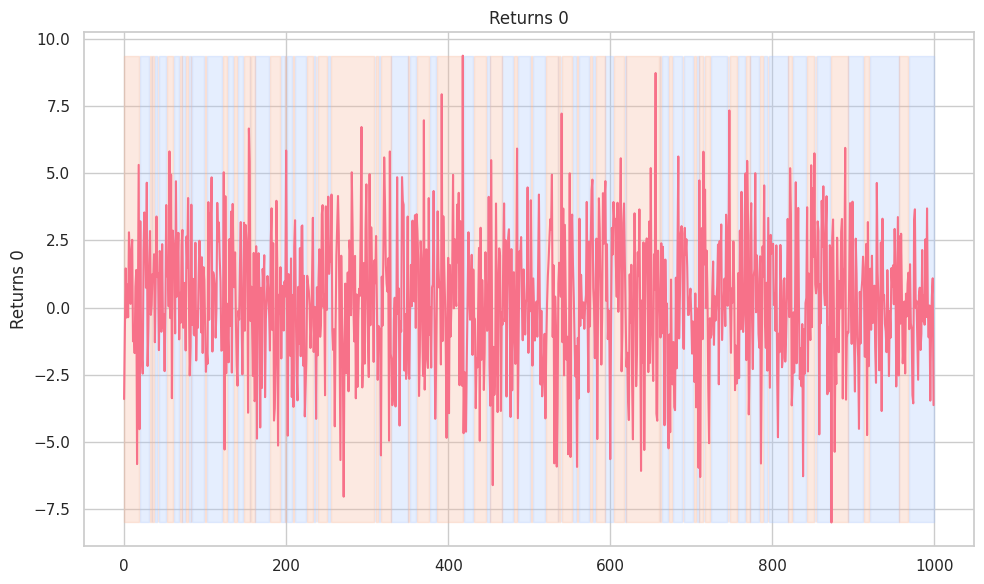

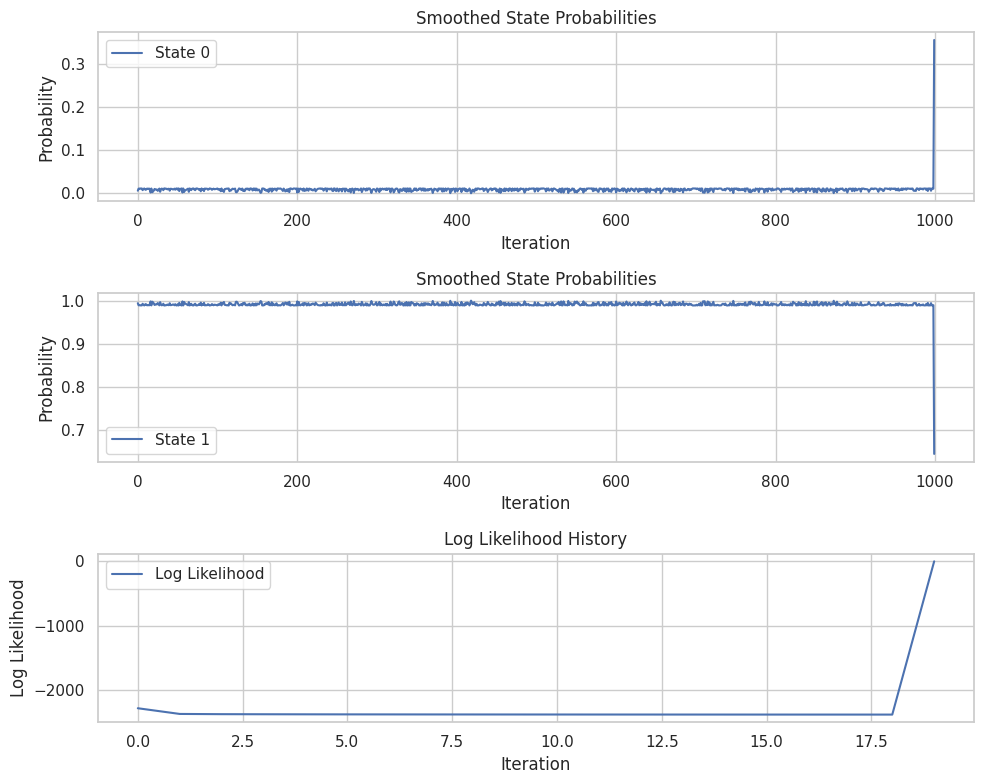

In [5]:
# Generate example data for the smoothed_state_probabilities and log_likelihood_histories for demonstration
sim.plot_simulation(separate=True, cum=False)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))

# Smoothed State Probabilities

axes[0].plot(model.smoothed_state_probabilities[0, :], label=f'State {0}')
axes[0].set_title('Smoothed State Probabilities')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Probability')
axes[0].legend()
axes[1].plot(model.smoothed_state_probabilities[1, :], label=f'State {1}')
axes[1].set_title('Smoothed State Probabilities')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Probability')
axes[1].legend()
# Log Likelihood Histories
axes[2].plot(model.log_likelihood_histories, label='Log Likelihood')
axes[2].set_title('Log Likelihood History')
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('Log Likelihood')
axes[2].legend()

plt.tight_layout()
plt.show()


In [6]:
from importlib import reload
reload(Tools)

from Tools import SV
from importlib import reload
reload(EM)
from EM import Base
results = []

for i in range(250):
    # Initialize and simulate data with the SV model
    sv = SV(num_series=1, num_obs=500, n_states=2)  # Adjust parameters as needed
    sv.simulate()
    print(i)
    # Fit the simulated data using the Base model (EM algorithm)
    model = Base(sv.data, max_iterations=100)  # Adjust initialization as needed
    model.fit()
    
    # Extract true parameters and estimated results
    true_params = {
        'transition_matrix': sv.transition_matrix,
        'sigmas': sv.sigmas,
    }
    estimated_params = model.result.x  # Placeholder for where results are stored
    
    # Store the extracted data
    results.append({
        'true_params': true_params,
        'estimated_params': estimated_params
    })
print(results)

0
1
2
3
4
5
6
7


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


8
9


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


10


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


11


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


12
13
14


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


15


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


16


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


17
18
19


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


20


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


21


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


22


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


23
24


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


25


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


26
27
28


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


29


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


30


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


31


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


32
33


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


34
35


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


36


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


37


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


38
39
40
41
42
43
44


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


45
46
47
48


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


49


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


50
51
52


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


53


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


54
55
56


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


57
58


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


59
60
61
62
63
64
65


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


66
67


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


68
69
70
71
72
73


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


74
75
76
77
78
79
80


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


81


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


82


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


83


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


84
85


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


86


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


87
88
89
90
91


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


92


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


93
94
95


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


96
97
98
99
100


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


101


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


102
103
104


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


105
106


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


107
108
109


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


110


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


111


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


112
113
114
115
116


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


117


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


118
119


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


120
121


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


122


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


123


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


124


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


125
126


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


127


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


128
129
130
131


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


132
133
134


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


135


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


136
137
138


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


139
140


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


141


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


142


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


143
144


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


145


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


146
147


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


148


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


149
150
151
152


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


153


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


154
155
156


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


157


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


158
159
160
161
162
163


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


164
165
166


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


167
168
169
170
171


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


172


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


173
174
175
176
177
178
179
180


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


181
182
183


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


184


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


185
186
187


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


188
189


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


190
191
192
193


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


194


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


195
196


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


197
198


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


199


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


200
201
202


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


203


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


204
205
206
207


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


208
209
210
211
212
213
214
215
216


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


217


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


218


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


219
220
221
222


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


223


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


224
225
226


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


227
228
229
230


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


231
232
233
234
235


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


236


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


237


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


238
239


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


240
241
242


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


243
244
245
246


/home/august/code/jupyter/Thesis/EM.py:246: RuntimeWarning: divide by zero encountered in log
  log_likelihood += sum([self.smoothed_state_probabilities[i, t] * np.log(self.Density(t, sigma[i])) for t in range(1, self.T)])
/home/august/.venvs/jupyter/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


247
248
249
[{'true_params': {'transition_matrix': array([[0.95, 0.05],
       [0.05, 0.95]]), 'sigmas': array([[0.94247076, 2.86696588]])}, 'estimated_params': array([0.97829475, 0.98653404, 0.79919795, 2.40322383])}, {'true_params': {'transition_matrix': array([[0.95, 0.05],
       [0.05, 0.95]]), 'sigmas': array([[0.86886453, 2.39566582]])}, 'estimated_params': array([0.96256853, 0.98214053, 0.6728554 , 2.29140735])}, {'true_params': {'transition_matrix': array([[0.95, 0.05],
       [0.05, 0.95]]), 'sigmas': array([[2.80619049, 1.38349269]])}, 'estimated_params': array([0.01      , 0.99      , 1.23385482, 2.14072704])}, {'true_params': {'transition_matrix': array([[0.95, 0.05],
       [0.05, 0.95]]), 'sigmas': array([[2.84978271, 1.5413874 ]])}, 'estimated_params': array([0.01      , 0.99      , 1.51586978, 2.37567786])}, {'true_params': {'transition_matrix': array([[0.95, 0.05],
       [0.05, 0.95]]), 'sigmas': array([[1.35452751, 2.71390622]])}, 'estimated_params': array([0.083679

In [9]:
# Assuming results_df is the DataFrame containing your results from the EM algorithm simulations
results_df = pd.DataFrame(results)
print(results_df)
differences = []  # To store the differences as described


                                           true_params  \
0    {'transition_matrix': [[0.95, 0.05], [0.05, 0....   
1    {'transition_matrix': [[0.95, 0.05], [0.05, 0....   
2    {'transition_matrix': [[0.95, 0.05], [0.05, 0....   
3    {'transition_matrix': [[0.95, 0.05], [0.05, 0....   
4    {'transition_matrix': [[0.95, 0.05], [0.05, 0....   
..                                                 ...   
245  {'transition_matrix': [[0.95, 0.05], [0.05, 0....   
246  {'transition_matrix': [[0.95, 0.05], [0.05, 0....   
247  {'transition_matrix': [[0.95, 0.05], [0.05, 0....   
248  {'transition_matrix': [[0.95, 0.05], [0.05, 0....   
249  {'transition_matrix': [[0.95, 0.05], [0.05, 0....   

                                      estimated_params  
0    [0.9782947470009491, 0.986534043492361, 0.7991...  
1    [0.9625685272232696, 0.9821405313791811, 0.672...  
2    [0.01, 0.99, 1.2338548214643705, 2.14072704194...  
3    [0.01, 0.99, 1.5158697765011624, 2.37567785578...  
4    [0.0836797552

In [12]:
# Given the data structure and the need to handle a larger dataset, we'll define a function to process the list of dictionaries and create a DataFrame.

def create_dataframe(data):
    rows = []
    for item in data:
        row = {
            'true_transition_00': item['true_params']['transition_matrix'][0, 0],
            'true_transition_11': item['true_params']['transition_matrix'][1, 1],
            'true_sigma_0': item['true_params']['sigmas'][0, 0],
            'true_sigma_1': item['true_params']['sigmas'][0, 1],
            'estimated_transition_00': item['estimated_params'][0],
            'estimated_transition_11': item['estimated_params'][1],
            'estimated_sigma_0': item['estimated_params'][2],
            'estimated_sigma_1': item['estimated_params'][3]
        }
        rows.append(row)
    return pd.DataFrame(rows)

# Assuming `data` is your list of dictionaries provided in the question
# Since the actual data for 250 items is not provided in full, we'll assume it's stored in a variable named `data`.
# If you have the data in another format or need to read it from a file, you'll need to adjust accordingly.

# Generate the DataFrame
df_large = create_dataframe(results)

# Display the first few rows of the dataframe to confirm it's structured correctly
df_large.head()


,true_transition_00,true_transition_11,true_sigma_0,true_sigma_1,estimated_transition_00,estimated_transition_11,estimated_sigma_0,estimated_sigma_1
0,0.95,0.95,0.942471,2.866966,0.978295,0.986534,0.799198,2.403224
1,0.95,0.95,0.868865,2.395666,0.962569,0.982141,0.672855,2.291407
2,0.95,0.95,2.806190,1.383493,0.010000,0.990000,1.233855,2.140727
3,0.95,0.95,2.849783,1.541387,0.010000,0.990000,1.515870,2.375678
4,0.95,0.95,1.354528,2.713906,0.083680,0.989410,1.183048,2.041801


In [13]:
# Subtract estimated transitions from true transitions
df_large['transition_diff_00'] = df_large['true_transition_00'] - df_large['estimated_transition_00']
df_large['transition_diff_11'] = df_large['true_transition_11'] - df_large['estimated_transition_11']

# For sigmas, subtract the largest estimated sigma from the largest true sigma, and the smallest from the smallest
df_large['sigma_diff_max'] = df_large[['true_sigma_0', 'true_sigma_1']].max(axis=1) - df_large[['estimated_sigma_0', 'estimated_sigma_1']].max(axis=1)
df_large['sigma_diff_min'] = df_large[['true_sigma_0', 'true_sigma_1']].min(axis=1) - df_large[['estimated_sigma_0', 'estimated_sigma_1']].min(axis=1)

# Display the first few rows of the updated dataframe to confirm the calculations
df_large[['transition_diff_00', 'transition_diff_11', 'sigma_diff_max', 'sigma_diff_min']].head()


,transition_diff_00,transition_diff_11,sigma_diff_max,sigma_diff_min
0,-0.028295,-0.036534,0.463742,0.143273
1,-0.012569,-0.032141,0.104258,0.196009
2,0.940000,-0.040000,0.665463,0.149638
3,0.940000,-0.040000,0.474105,0.025518
4,0.866320,-0.039410,0.672106,0.171480


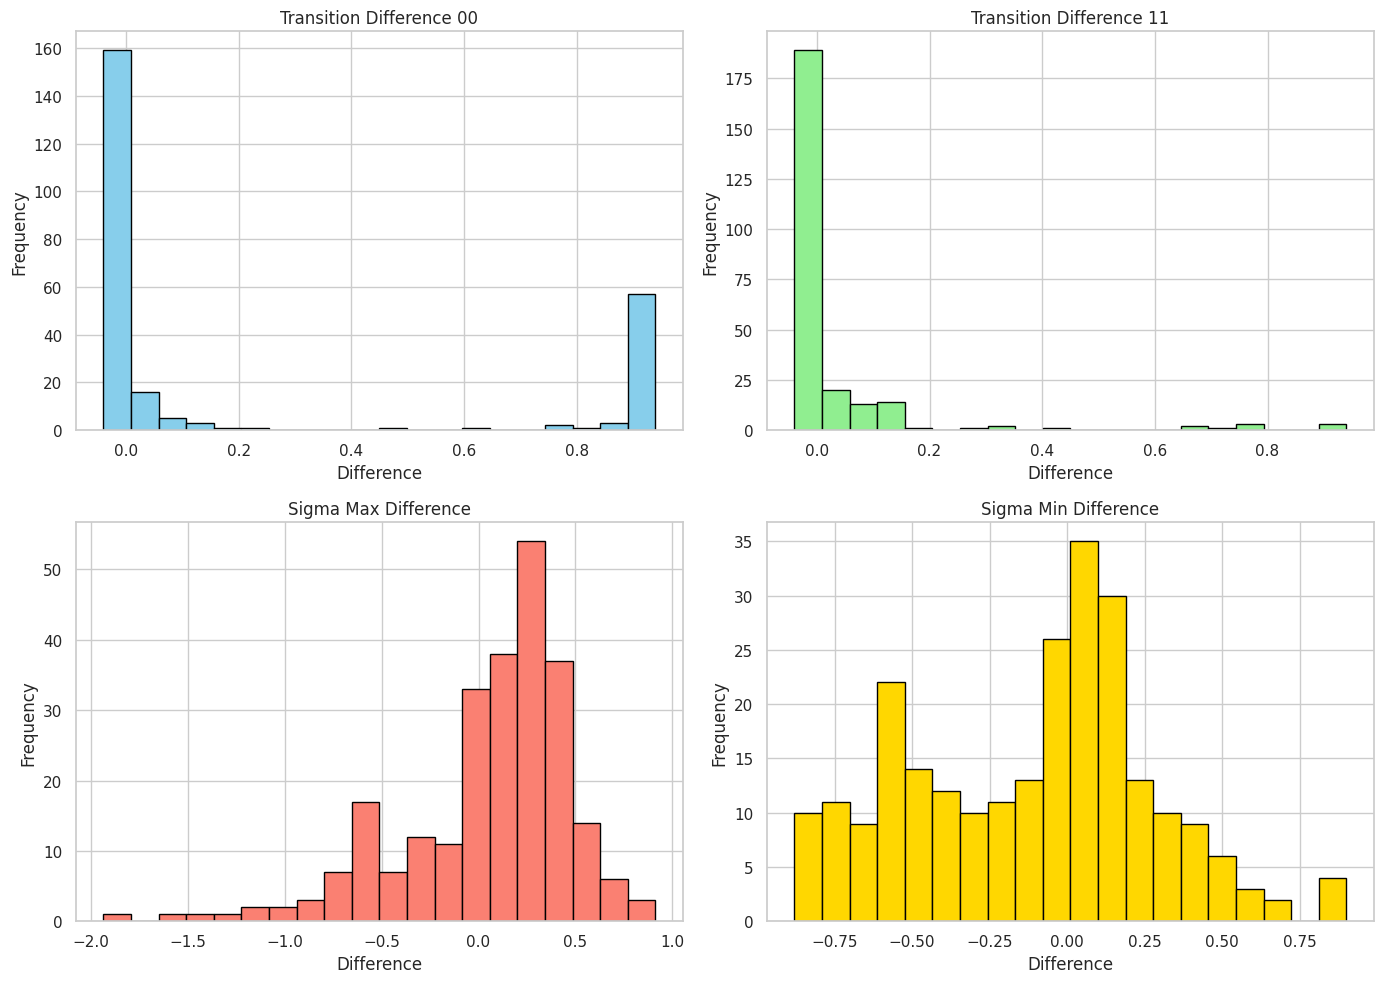

In [18]:
import matplotlib.pyplot as plt

# Plot histograms for the transition differences and sigma differences
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Transition difference histograms
axs[0, 0].hist(df_large['transition_diff_00'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Transition Difference 00')
axs[0, 0].set_xlabel('Difference')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(df_large['transition_diff_11'], bins=20, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Transition Difference 11')
axs[0, 1].set_xlabel('Difference')
axs[0, 1].set_ylabel('Frequency')

# Sigma difference histograms
axs[1, 0].hist(df_large['sigma_diff_max'], bins=20, color='salmon', edgecolor='black')
axs[1, 0].set_title('Sigma Max Difference')
axs[1, 0].set_xlabel('Difference')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(df_large['sigma_diff_min'], bins=20, color='gold', edgecolor='black')
axs[1, 1].set_title('Sigma Min Difference')
axs[1, 1].set_xlabel('Difference')
axs[1, 1].set_ylabel('Frequency')
plt.savefig('SV 250 Sim Separate Histogram.png')
plt.tight_layout()
plt.show()


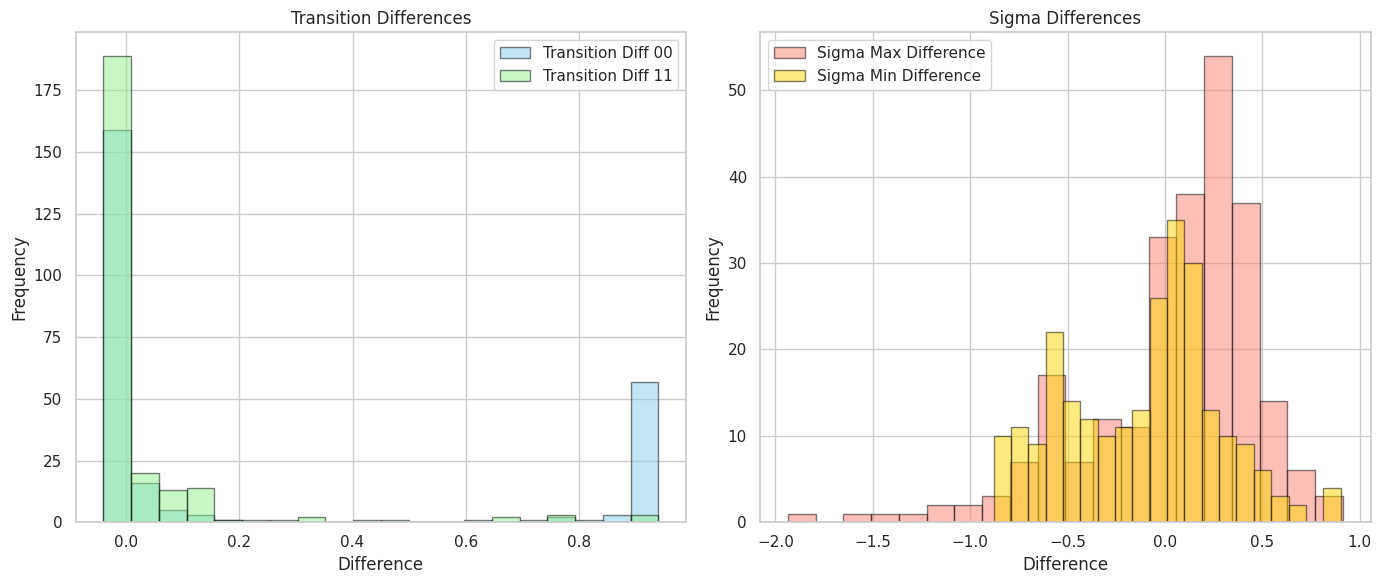

In [15]:
# Plot histograms for both transitions together in one plot, and both sigmas in another plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Transition differences together
axs[0].hist(df_large['transition_diff_00'], bins=20, alpha=0.5, label='Transition Diff 00', color='skyblue', edgecolor='black')
axs[0].hist(df_large['transition_diff_11'], bins=20, alpha=0.5, label='Transition Diff 11', color='lightgreen', edgecolor='black')
axs[0].set_title('Transition Differences')
axs[0].set_xlabel('Difference')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Sigma differences together
axs[1].hist(df_large['sigma_diff_max'], bins=20, alpha=0.5, label='Sigma Max Difference', color='salmon', edgecolor='black')
axs[1].hist(df_large['sigma_diff_min'], bins=20, alpha=0.5, label='Sigma Min Difference', color='gold', edgecolor='black')
axs[1].set_title('Sigma Differences')
axs[1].set_xlabel('Difference')
axs[1].set_ylabel('Frequency')
axs[1].legend()

plt.tight_layout()
plt.show()


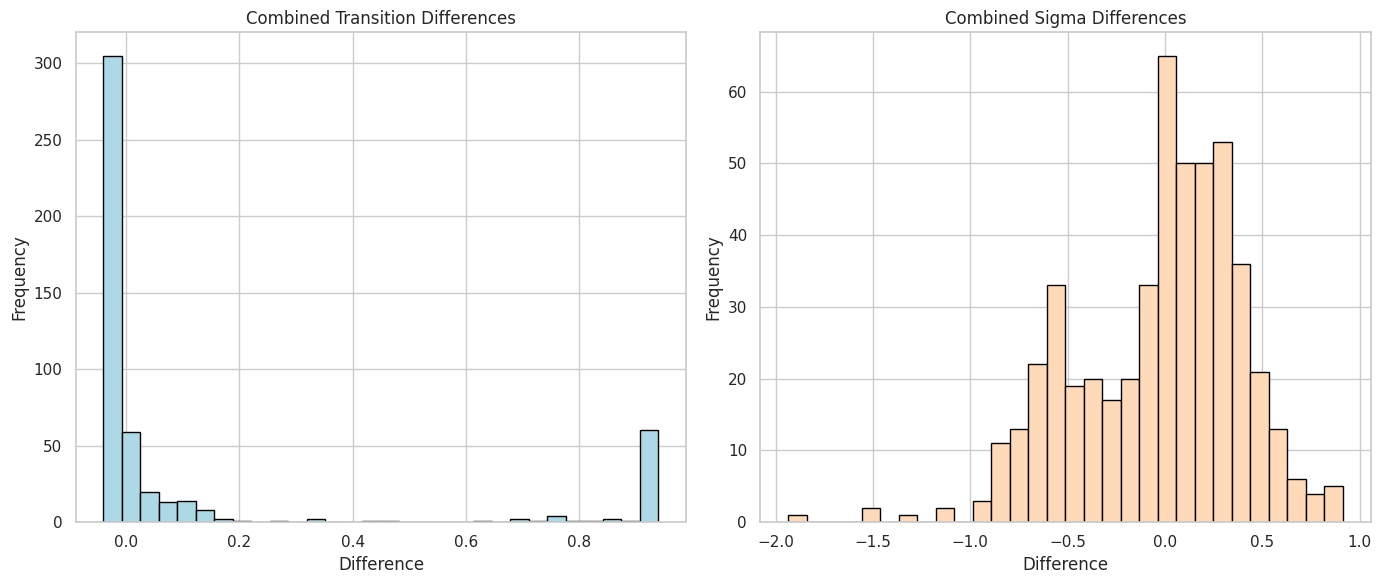

In [17]:
# To visualize the overall errors in estimating sigma and transitions, we'll combine the respective differences into single histograms.

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Combine the transition differences into a single histogram
transition_diffs_combined = pd.concat([df_large['transition_diff_00'], df_large['transition_diff_11']])
axs[0].hist(transition_diffs_combined, bins=30, color='lightblue', edgecolor='black')
axs[0].set_title('Combined Transition Differences')
axs[0].set_xlabel('Difference')
axs[0].set_ylabel('Frequency')

# Combine the sigma differences into a single histogram
sigma_diffs_combined = pd.concat([df_large['sigma_diff_max'], df_large['sigma_diff_min']])
axs[1].hist(sigma_diffs_combined, bins=30, color='peachpuff', edgecolor='black')
axs[1].set_title('Combined Sigma Differences')
axs[1].set_xlabel('Difference')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('SV 250 sim combined histograms.png')
plt.show()
